# **Python et intelligence artificielle**

# *Séance n°4bis : Introduction à la programmation orientée-objet*

# Objectif

Dans ce TP, vous allez vous familiariser avec la programmation orientée objet en Python. Après une présentations des différents concepts, vous les mettrez en oeuvre afin de constituer les briques d'une application de gestion de formes géométriques.

# 1. Introduction au paradigme objet

Le paradigme objet est un modèle de programmation qui permet de représenter des objets du monde réel, leurs interactions et leurs comportements dans un programme informatique. Au coeur de ce paradigme se trouvent les concepts de **classes** et d'**objets**, d'**encapsulation**, d'**héritage** et de **polymorphisme**. Nous présenterons aussi les relations que l'on peut mettre en oeuvre entre nos classes.

### 1.1. Classes et objets

- **Classe** : Une classe est un modèle qui définit les *attributs* (caractéristiques) et les *méthodes* (fonctions) que ses objets (instances) auront. 
- **Objet** : Un objet est une instance d'une classe. C'est une réalisation concrète du modèle défini par la classe.

#### Exemple :

Prenons l'exemple d'une classe `Vehicule` qui représente un véhicule.

```python
class Vehicule:
    def __init__(self, couleur, poids):
        self.couleur = couleur
        self.poids = poids

    def demarrer(self):
        print("Le véhicule démarre.")
```

Ici, `Vehicule` est une classe avec deux attributs (`couleur` et `poids`) et deux méthodes (`__init__` et `demarrer`). En Python, la méthode `__init__` est ce qu'on appelle un **constructeur**$^{[1]}$. C'est une méthode particulière qui est automatiquement appelée lorsqu'un objet d'une classe est créé. 
Le constructeur est généralement utilisé pour initialiser (c'est-à-dire attribuer des valeurs) aux attributs d'un objet. C'est l'endroit idéal pour préparer un nouvel objet à être utilisé dans le programme. 

[1]: Si vous ne fournissez pas de constructeur, Python en fournira un par défaut qui ne fait rien.

Pour créer un objet de la classe `Vehicule` on écrira par exemple :

```python
mon_vehicule = Vehicule("blanc", 1150) # __init__() est appelée
```

`mon_vehicule` est maintenant un objet de la classe `Vehicule`.

### 1.2. Encapsulation

L'encapsulation est le regroupement des données (attributs) et des méthodes qui agissent sur les données au sein d'une classe. Elle permet également de restreindre l'accès direct à certains attributs ou méthodes, les rendant "privés". Attention toutefois et contrairement à d'autres langages objets (C++, Java), en Python un membre privé reste techniquement accessible.

#### Exemple :

```python
class Vehicule:
    def __init__(self, couleur, poids):
        self._couleur = couleur  # attribut privé par convention, mais accessible comme poids
        self.poids = poids

    def get_couleur(self):  # méthode pour accéder à l'attribut privé
        return self._couleur

    # ...
```

### 1.3. Héritage

L'héritage permet à une classe d'hériter des attributs et des méthodes d'une autre classe. Cela facilite la réutilisation du code.

#### Exemple :

La classe `Voiture` est un `Vehicule` avec des comportements spécifiques.

```python
class Voiture(Vehicule):  # Voiture hérite de Vehicule
    def __init__(self, couleur, poids, modele):
        super().__init__(couleur, poids)
        self.modele = modele

    def demarrer(self):
        print("La clé de contact est tournée.")

    def klaxonner(self):
        print("Pouet pouet !")
```

Ici, `Voiture` est une classe *enfant* de la classe `Vehicule`. Elle hérite des attributs et des méthodes de `Vehicule` et ajoute un nouvel attribut `marque` et une nouvelle méthode `klaxonner()`.

### 1.4. Polymorphisme

Le polymorphisme permet à des objets de différentes classes d'être traités comme des instances d'une même classe. C'est particulièrement utile lorsque ces classes ont des méthodes du même nom mais des implémentations différentes.

#### Exemple :

Bien que les classes `Bicyclette` et `Trottinette` ci-dessous soient différentes, elles sont toutes deux des `Vehicules`. 

```python
class Bicyclette(Vehicule):
    # ...
    
    def demarrer(self):
        print("Les pédales sont actionnées.")

class Trottinette(Vehicule):
    # ...
    
    def demarrer(self):
        print("La gâchette d'accélération est activée.")
```

Grâce au polymorphisme, nous pouvons les démarrer de la même manière, même si l'action sous-jacente est différente :

```python
def demarrer_vehicule(vehicule):
    vehicule.demarrer()

mon_velo = Bicyclette("blanc", 20)
ma_trottinette = Trottinette("gris", 13)

demarrer_vehicule(mon_velo)  # Affiche "Les pédales sont actionnées."
demarrer_vehicule(ma_trottinette)  # Affiche "La gâchette d'accélération est activée."
```

### 1.5. Relations

#### 1.5.1. Association

L'association est une relation entre deux classes qui est utilisée pour établir une certaine activité. Dans le contexte des véhicules, considérons une nouvelle classe `Conducteur` et la classe précédente `Voiture`. Une personne peut posséder une voiture, mais la suppression de la personne n'entraîne pas nécessairement la suppression de la voiture.

```python
class Personne:
    def __init__(self, nom):
        self.nom = nom

    def possede_voiture(self, voiture):
        print(f"{self.nom} possède la voiture {voiture.modele}.")
```

#### 1.5.2. Agrégation

L'agrégation est une relation spécialisée d'association où une classe appartient à une autre classe mais a une existence indépendante. Prenons l'exemple d'une `Voiture` et d'un `Moteur`. Une voiture a un moteur, mais le moteur peut exister indépendamment de la voiture.

```python
class Moteur:
    def __init__(self, type):
        self.type = type

class Voiture(Vehicule):
    def __init__(couleur, poids, modele, moteur):
        super().__init__(couleur, poids)
        self.modele = modele
        self.moteur = moteur
```

Dans cet exemple, si la voiture est détruite, son moteur peut continuer à exister.

#### 1.5.3. Composition

La composition implique une relation forte et dépendante entre deux objets, où la destruction de l'objet conteneur entraîne la destruction de l'objet contenu. Pour l'exemple des véhicules, considérons la relation entre une `Voiture` et un `Chassis`. Si une voiture est détruite, son châssis, qui est une partie intégrante de la voiture, n'a plus de sens indépendamment et est également détruit.

Voici comment cela pourrait être représenté :

```python
class Chassis:
    def __init__(self, numero):
        self.numero = numero

class Voiture(Vehicule):
    def __init__(self, couleur, poids, modele, moteur, numero_chassis):
        super().__init__(couleur, poids)
        self.model = model
        self.moteur = moteur
        self.chassis = Chassis(numero_chassis)

    # ...
    
    def destroy(self):
        print(f"La voiture {self.modele} est détruite.")
        del self.chassis
```

Dans cet exemple, le `Chassis` est une partie intégrante de la `Voiture`. Lorsque la `Voiture` est détruite (via la méthode `destroy()`), le `Chassis` associé est également détruit. Cette relation est un exemple de composition, car le `Chassis` n'a pas d'existence indépendante en dehors de la `Voiture`.

### 1.6. Conclusion

> Le paradigme objet offre une manière structurée et intuitive de représenter et de manipuler des objets du monde réel dans un programme. En utilisant des classes, l'encapsulation, l'héritage et le polymorphisme, nous pouvons créer des programmes modulaires, réutilisables et flexibles.

# 2. Exercice
## 2.1. Modélisation des composants géométriques

Définissez chacune des classes suivantes :

### 2.1.1. Classe `Shape`

Cette classe représente une forme géométrique dans le plan. Elle doit avoir les attributs suivants :

- `x` : l'abscisse du centre d'inertie de la forme géométrique.
- `y` : l'ordonnée du centre d'inertie de la forme géométrique.

Le constructeur :

- `__init__(self, x=0, y=0)` : crée une forme dont le centre d'inertie a pour coordonnées (`x`, `y`), et est placé à l'origine par défaut.

Et les méthodes :

- `area(self)` : retourne l'aire de la forme géométrique. Toutefois cette méthode devra être définie par les classes filles et génère une exception en cas d'appel.
- `perimeter(self)` : retourne le périmètre de la forme géométrique. Toutefois cette méthode devra être définie par les classes filles et génère une exception en cas d'appel.
- `dilate(self, factor)` : dilate la forme du facteur donné. Toutefois cette méthode devra être définie par les classes filles et génère une exception en cas d'appel.
- `compress(self, factor)` : réduit la forme du facteur donné. Toutefois cette méthode devra être définie par les classes filles et génère une exception en cas d'appel.
- `translate(self, dx, dy)` : réalise une translation du centre d'inertie de la forme.
- `rotate(self, angle_degrees)` : réalise une rotation du centre d'inertie de la forme autour de l'origine.

In [1]:
import math

class Shape:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def area(self):
        raise NotImplementedError("area() has to be implemented!")

    def perimeter(self):
        raise NotImplementedError("perimeter() has to be implemented!")

    def dilate(self, factor):
        raise NotImplementedError("dilate() has to be implemented!")

    def compress(self, factor):
        raise NotImplementedError("compress() has to be implemented!")

    def translate(self, dx, dy):
        self.x += dx
        self.y += dy

    def rotate(self, angle_degrees):
        angle_radians = math.radians(angle_degrees)
        new_x = self.x * math.cos(angle_radians) - self.y * math.sin(angle_radians)
        new_y = self.x * math.sin(angle_radians) + self.y * math.cos(angle_radians)
        self.x, self.y = new_x, new_y


### 2.1.2. Classe `Rectangle`

La classe `Rectangle` hérite de `Shape`. Elle doit avoir les attributs suivants :

- `width` : la largeur du rectangle.
- `height` : la hauteur du rectangle.

Le constructeur :

- `__init__(self, width, height, x=0, y=0)` : crée un rectangle de largeur et de hauteur données, et dont le centre d'inertie a pour coordonnées (`x`, `y`), et est placé à l'origine par défaut. 

Et les méthodes :

- `area(self)` : retourne l'aire du rectangle. 
- `perimeter(self)` : retourne le périmètre du rectangle.
- `dilate(self, factor)` : dilate le rectangle du facteur donné.
- `compress(self, factor)` : réduit le rectangle du facteur donné.


Elle dispose aussi d'une méthode `draw()` qui vous est fournie (revoir la séance n°2, ainsi que la documentation [https://matplotlib.org](https://matplotlib.org) et [https://www.geeksforgeeks.org/matplotlib-axes-axes-add_patch-in-python/](https://www.geeksforgeeks.org/matplotlib-axes-axes-add_patch-in-python/) pour l'utilisation de la méthode `add_patch()`).

La surface du rectangle est : 15
Le périmètre du rectangle est : 16
Le périmètre du rectangle dilaté est : 32
Le périmètre du rectangle compressé est : 16.0


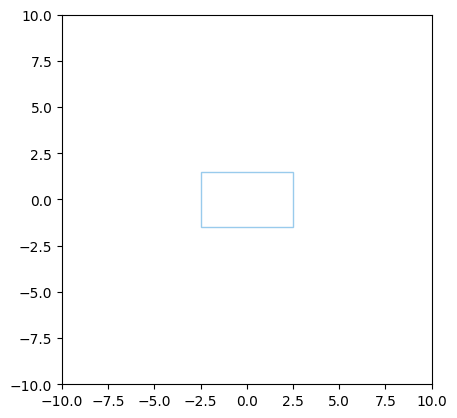

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#
# Rectangle class to complete ....
#
class Rectangle
    def draw(self, zones_trace):
        zones_trace.add_patch(patches.Rectangle((self.x - self.width/2, self.y - self.height/2), self.width, self.height, fill=False, color='#3498DB', alpha=0.5))

# Testing the Rectangle class
rectangle = Rectangle(5, 3)
print(f"La surface du rectangle est : {rectangle.area()}")
print(f"Le périmètre du rectangle est : {rectangle.perimeter()}")
rectangle.dilate(2)
print(f"Le périmètre du rectangle dilaté est : {rectangle.perimeter()}")
rectangle.compress(2)
print(f"Le périmètre du rectangle compressé est : {rectangle.perimeter()}")

# Drawing it with matplotlib
fig, zones_trace = plt.subplots()
rectangle.draw(zones_trace)
zones_trace.set_xlim(-10, 10)
zones_trace.set_ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 2.1.3. Classe `Square`

La classe `Square` est un rectangle particulier et hérite de `Rectangle`. Seul son constructeur sera défini.


La surface du carré est : 16
Le périmètre du carré est : 16
Le périmètre du carré dilaté est : 32
Le périmètre du carré compressé est : 16.0


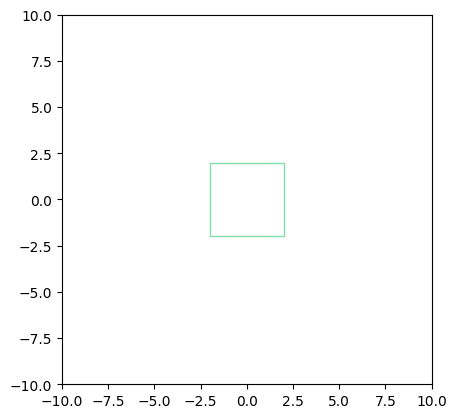

In [10]:
#
# Square class to complete ....
#
class Square

# Testing the Square class
square = Square(4)
print(f"La surface du carré est : {square.area()}")
print(f"Le périmètre du carré est : {square.perimeter()}")
square.dilate(2)
print(f"Le périmètre du carré dilaté est : {square.perimeter()}")
square.compress(2)
print(f"Le périmètre du carré compressé est : {square.perimeter()}")

# Drawing it with matplotlib
fig, ax = plt.subplots()
square.draw(ax)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 2.1.4. Classe `Triangle`

La classe `Triangle` hérite de `Shape`. Elle doit avoir les attributs suivants :

- `a` : un des sommets du triangle.
- `b` : un des sommets du triangle.
- `c` : un des sommets du triangle.

Le constructeur :

- `__init__(self, a, b, c)`: crée un triangle dont les sommets sont placés aux points `a`, `b` et `c` (le centre d'inertie du triangle ne se trouve donc pas forcément à l'origine).

Et les méthodes :

- `area(self)` : retourne l'aire du triangle. 
- `perimeter(self)` : retourne le périmètre du triangle.
- `dilate(self, factor)` : dilate le triangle du facteur donné.
- `compress(self, factor)` : réduit le triangle du facteur donné.


La surface du triangle est : 13.999999999999991
Le périmètre du triangle est : 18.560219778561034


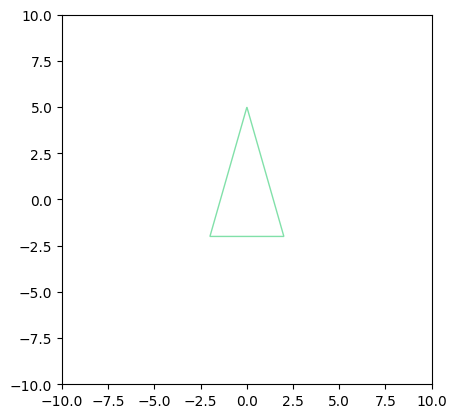

In [24]:
#
# Triangle class to complete ....
#
class Triangle(Shape):
    def draw(self, ax):
        triangle = ax.add_patch(patches.Polygon([self.a, self.b, self.c], closed=True, fill=False, color='#2ECC71', alpha=0.6))

# Testing the Triangle class
triangle = Triangle((0, 5), (-2, -2), (2, -2))
print(f"La surface du triangle est : {triangle.area()}")
print(f"Le périmètre du triangle est : {triangle.perimeter()}")

# Drawing with matplotlib
fig, ax = plt.subplots()
triangle.draw(ax)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 2.1.5. Classe `Circle`

La classe `Circle` hérite de `Shape`. Elle doit avoir les attributs suivants :

- `radius` : le rayon du cercle.

Le constructeur `__init__(self, radius, x=0, y=0)` : crée un cercle de rayon donné, et dont le centre d'inertie a pour coordonnées (x, y), et est placé à l'origine par défaut.

Et les méthodes :

- `area(self)` : retourne l'aire du cercle. 
- `perimeter(self)` : retourne le périmètre du cercle.
- `dilate(self, factor)` : dilate le cercle du facteur donné.
- `compress(self, factor)` : réduit le cercle du facteur donné.


La surface du cercle est : 3.141592653589793
Le périmètre du cercle est : 6.283185307179586
Le périmètre du cercle dilaté est : 12.566370614359172
Le périmètre du cercle compressé est : 6.283185307179586


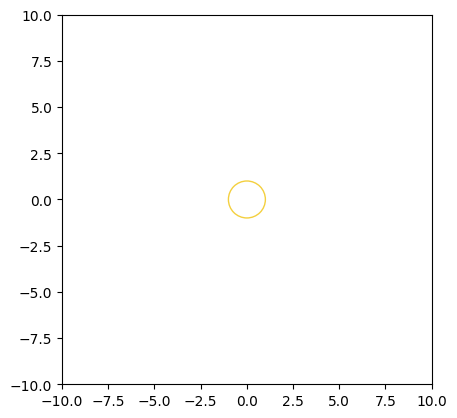

In [8]:
#
# Circle class to complete ....
#
class Circle(Shape):
    def draw(self, ax):
        ax.add_patch(patches.Circle((self.x, self.y), self.radius, fill=False, color='#F1C40F', alpha=0.8))

# Testing the Circle class
circle = Circle(1)
print(f"La surface du cercle est : {circle.area()}")
print(f"Le périmètre du cercle est : {circle.perimeter()}")
circle.dilate(2)
print(f"Le périmètre du cercle dilaté est : {circle.perimeter()}")
circle.compress(2)
print(f"Le périmètre du cercle compressé est : {circle.perimeter()}")

# Drawing with matplotlib
fig, ax = plt.subplots()
circle.draw(ax)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 2.2. Un premier scénario

1. Créez une liste de formes géométriques formée d'un cercle de rayon 2, un carré de côté 3, un triangle rectangle dont les sommets sont placés en (3, 4, 5) et un rectangle de largeur 4 et de hauteur 2.
2. Créez deux fonctions permettant d'affichez leurs périmètres et leurs aires et testez-les.
3. Affichez les formes à l'aide de matplotlib.
4. Dilatez le cercle d'un facteur $\frac{3}{2}$ et affichez les formes en complétant la fonction `has_fun()`.
5. Réduisez le rectangle d'un rapport 4 et affichez les formes.
6. Translatez le rectangle en (4, 0) et affichez les formes.
7. Translatez le cercle en (2, 3) et affichez les formes.
8. Effectuez une rotation du rectangle de 45° autour de l'origine et affichez les formes.
9. Effectuez à nouveau une rotation du rectangle de 45° autour de l'origine et affichez les formes.


La surface de Circle est: 12.566370614359172
La surface de Square est: 9
La surface de Triangle est: 13.999999999999991
La surface de Rectangle est: 8
Le périmètre de Circle est: 12.566370614359172
Le périmètre de Square est: 12
Le périmètre de Triangle est: 18.560219778561034
Le périmètre de Rectangle est: 12


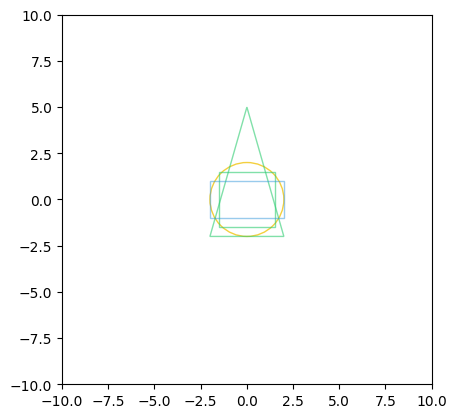

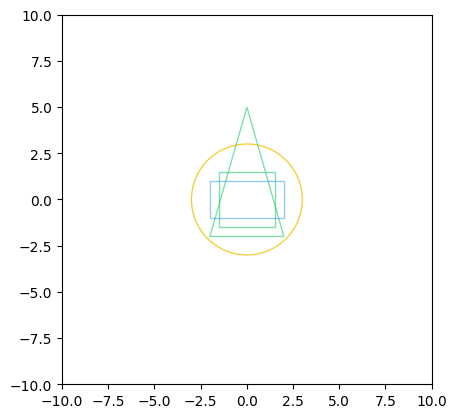

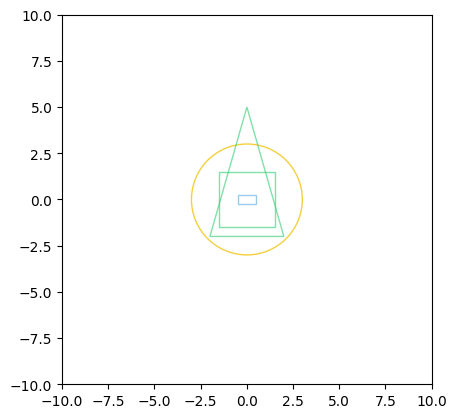

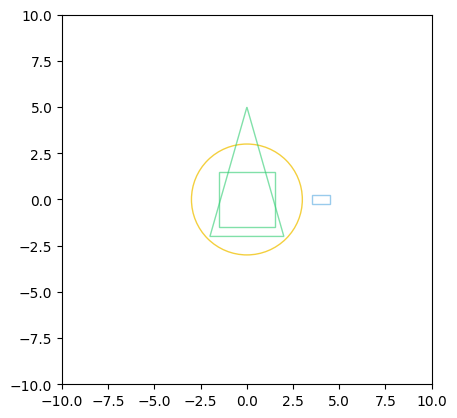

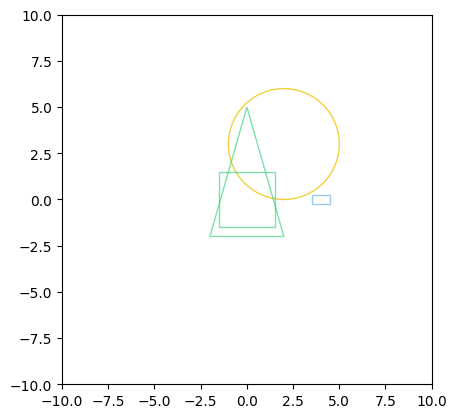

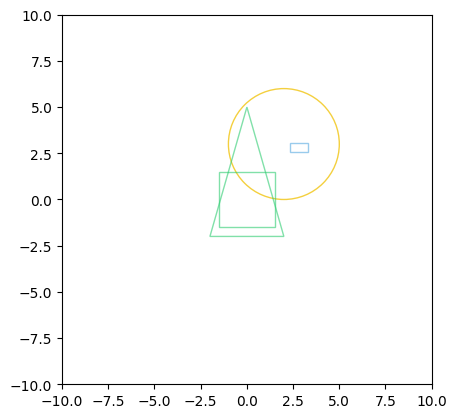

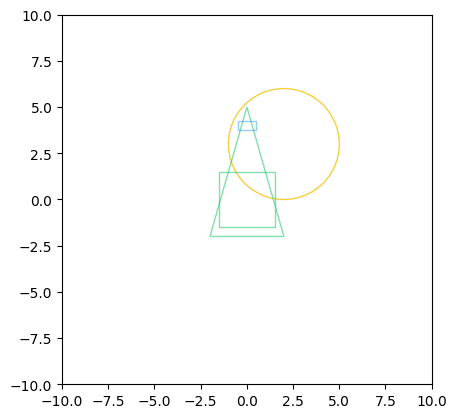

In [25]:
# Your code

## 2.3. Amélioration des classes

Améliorez vos formes de manière à ce qu'elles puissent être définies avec une couleur modifiable et puissent être et remplies ou non.